# Running a decision tree

In [1]:
# -*- coding: utf-8 -*-

from pandas import Series, DataFrame
from pandas import *
import numpy as np
import os
import matplotlib.pylab as plt
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics

#Load the dataset
data = read_csv("data/marscrater_pds.csv")
data.dropna(inplace=True)
data.head()

,﻿CRATER_ID,CRATER_NAME,LATITUDE_CIRCLE_IMAGE,LONGITUDE_CIRCLE_IMAGE,DIAM_CIRCLE_IMAGE,DEPTH_RIMFLOOR_TOPOG,MORPHOLOGY_EJECTA_1,MORPHOLOGY_EJECTA_2,MORPHOLOGY_EJECTA_3,NUMBER_LAYERS
0,01-000000,,84.367,108.746,82.10,0.22,,,,0
1,01-000001,Korolev,72.760,164.464,82.02,1.97,Rd/MLERS,HuBL,,3
2,01-000002,,69.244,-27.240,79.63,0.09,,,,0
3,01-000003,,70.107,160.575,74.81,0.13,,,,0
4,01-000004,,77.996,95.617,73.53,0.11,,,,0


In [2]:
data.columns

Index([u'﻿CRATER_ID', u'CRATER_NAME', u'LATITUDE_CIRCLE_IMAGE',
       u'LONGITUDE_CIRCLE_IMAGE', u'DIAM_CIRCLE_IMAGE',
       u'DEPTH_RIMFLOOR_TOPOG', u'MORPHOLOGY_EJECTA_1', u'MORPHOLOGY_EJECTA_2',
       u'MORPHOLOGY_EJECTA_3', u'NUMBER_LAYERS'],
      dtype='object')

In [3]:
import random
data = data.iloc[random.sample(xrange(len(data)), 5000)] 
# my pc was having trouble at last step so reduce to random sample of 5000

In [4]:
data.dtypes

﻿CRATER_ID                 object
CRATER_NAME                object
LATITUDE_CIRCLE_IMAGE     float64
LONGITUDE_CIRCLE_IMAGE    float64
DIAM_CIRCLE_IMAGE         float64
DEPTH_RIMFLOOR_TOPOG      float64
MORPHOLOGY_EJECTA_1        object
MORPHOLOGY_EJECTA_2        object
MORPHOLOGY_EJECTA_3        object
NUMBER_LAYERS               int64
dtype: object

In [5]:
data.describe()

,LATITUDE_CIRCLE_IMAGE,LONGITUDE_CIRCLE_IMAGE,DIAM_CIRCLE_IMAGE,DEPTH_RIMFLOOR_TOPOG,NUMBER_LAYERS
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,-6.326783,8.027501,3.590156,0.077258,0.071400
std,33.606754,96.713129,8.346302,0.222560,0.318626
min,-82.163000,-179.981000,1.000000,0.000000,0.000000
25%,-30.043250,-61.928250,1.180000,0.000000,0.000000
50%,-9.455000,10.363000,1.500000,0.000000,0.000000
75%,18.445250,88.334250,2.582500,0.000000,0.000000
max,78.707000,179.996000,223.020000,3.640000,3.000000


In [6]:
## our target is going to be whether or not the crater is large
## we're defining large diameter craters as greater than 3 km
data['LARGE_DIAM'] = data.DIAM_CIRCLE_IMAGE >= 3.0
sum(data.LARGE_DIAM == True)

1064

In [7]:
#Split into training and testing sets

predictors = data[['LATITUDE_CIRCLE_IMAGE', 'LONGITUDE_CIRCLE_IMAGE', 'DEPTH_RIMFLOOR_TOPOG', 'NUMBER_LAYERS']]

targets = data.LARGE_DIAM

X_train, X_test, y_train, y_test  =   train_test_split(predictors, targets, test_size=.4)

X_train.shape

(3000, 4)

In [8]:
X_test.shape

(2000, 4)

In [9]:
y_train.shape

(3000L,)

In [10]:
y_test.shape

(2000L,)

In [11]:
#Build model on training data
classifier=DecisionTreeClassifier()
classifier=classifier.fit(X_train,y_train)

predictions=classifier.predict(X_test)

In [12]:
confmatrix = sklearn.metrics.confusion_matrix(y_test,predictions)
confmatrix = DataFrame(data=confmatrix, 
                       columns=['Actual small crater', 'Actual large crater'],
                       index=['Predicted small crater', 'Predicted large crater'])
confmatrix

,Actual small crater,Actual large crater
Predicted small crater,1472,94
Predicted large crater,80,354


In [13]:
sklearn.metrics.accuracy_score(y_test, predictions)

0.91300000000000003

In [14]:
# -*- coding: utf-8 -*-
#Displaying the decision tree
from sklearn import tree
from io import BytesIO
from IPython.display import Image
out = BytesIO()
tree.export_graphviz(classifier, out_file=out)

In [15]:
import pydotplus

In [16]:
graph=pydotplus.graph_from_dot_data(out.getvalue())

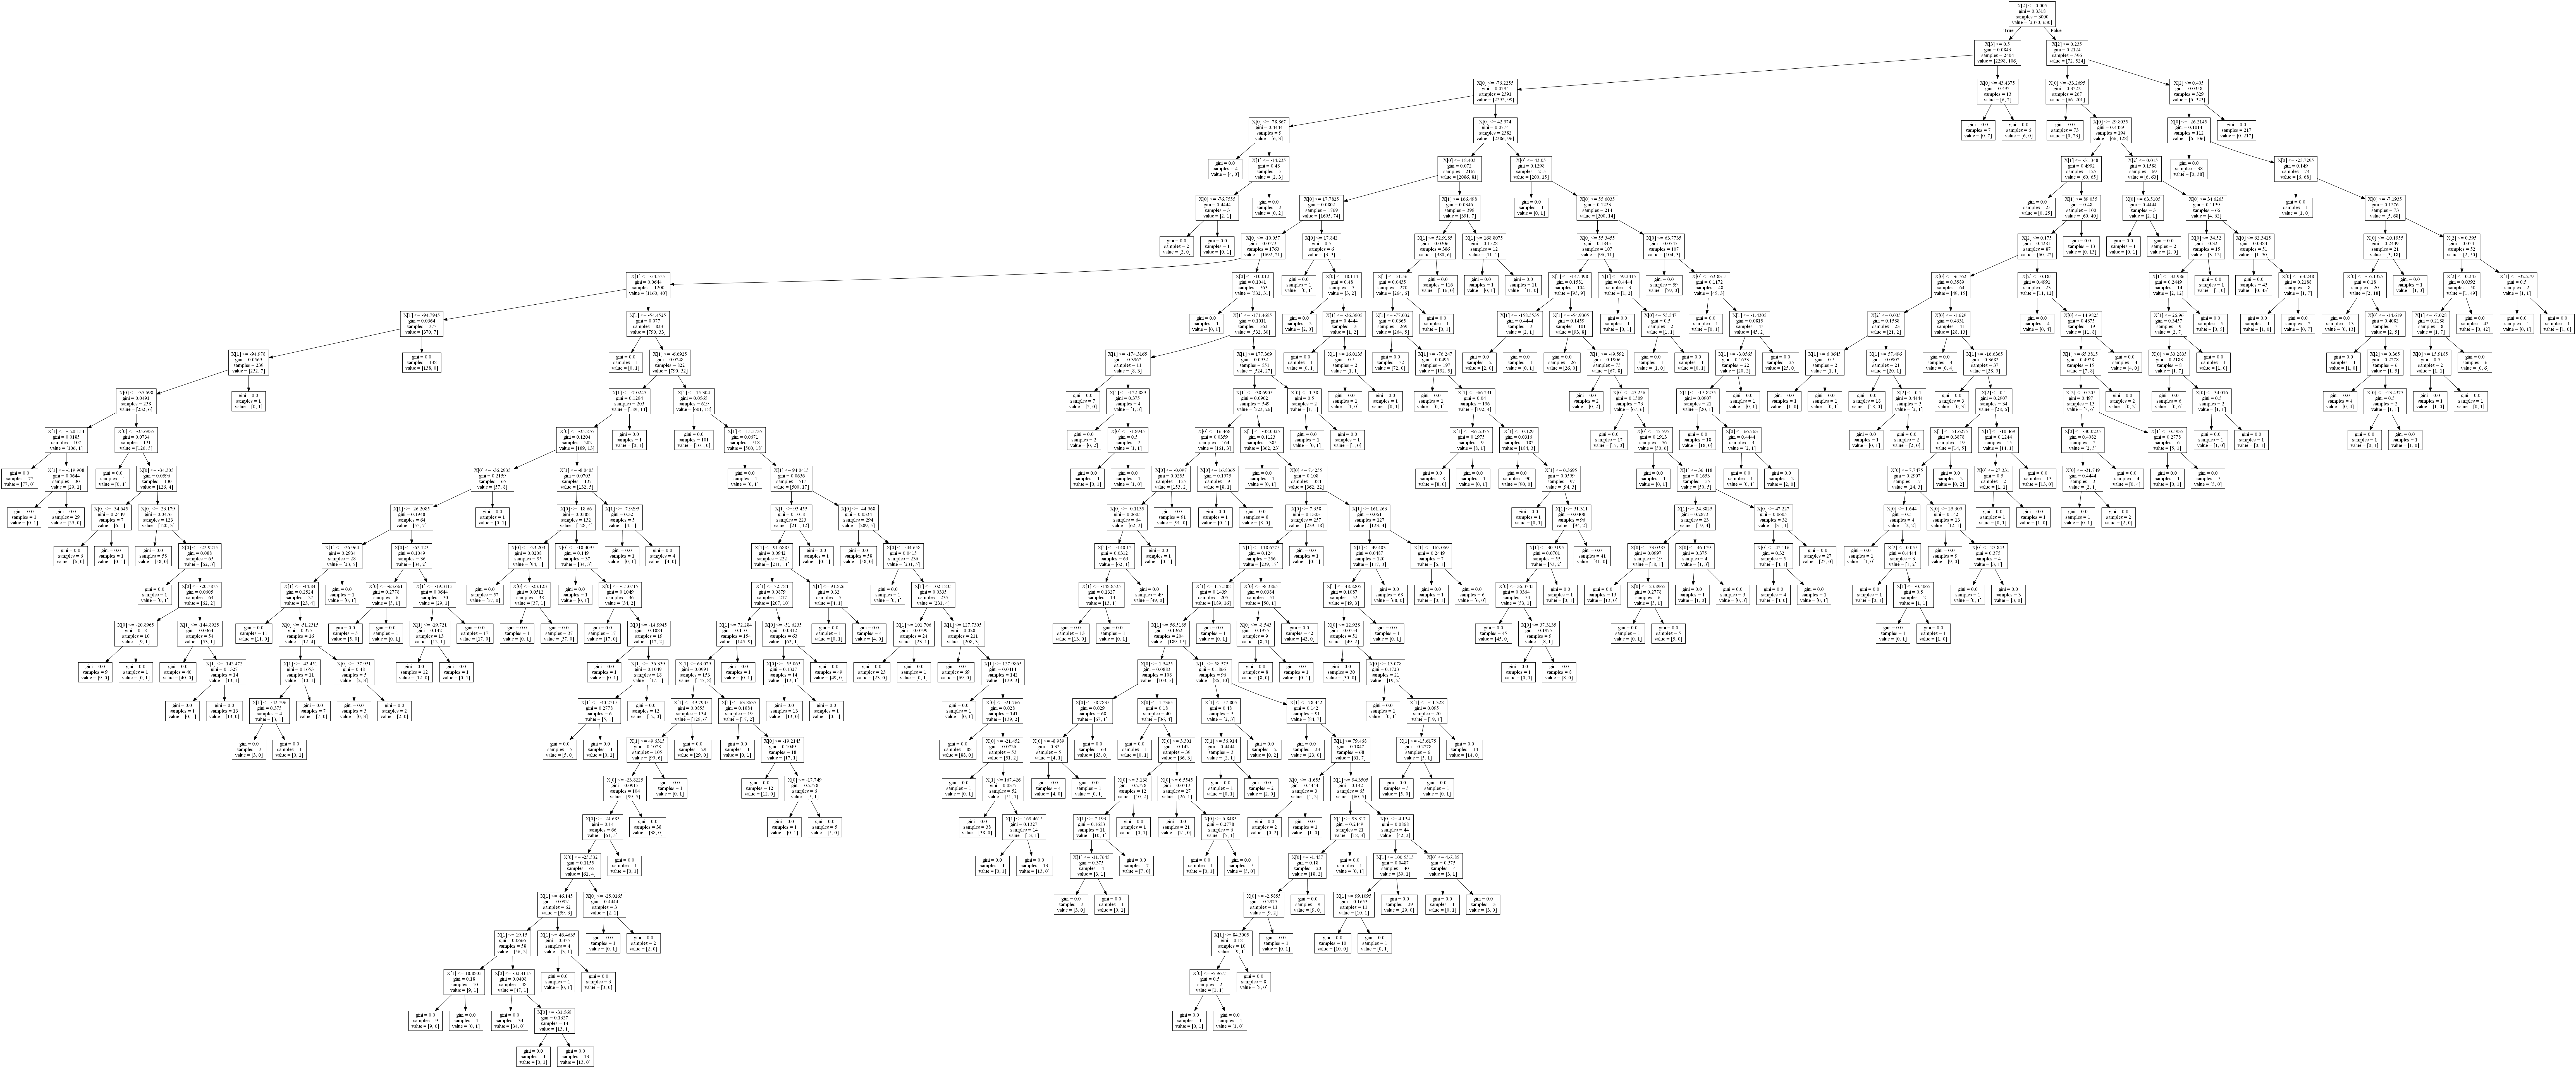

In [17]:
Image(graph.create_png())

In [18]:
f = open('tree5000.png','wb')
f.write(graph.create_png())
f.close()

See [tree5000.png](tree5000.png) for larger image.